In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [3]:
def f(x , phi0 , phi1):
    #equation of a straightline(y=mx+c)
    y=phi1 * x + phi0
    return y

In [5]:
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, x')
    ax.set_ylabel('Output, y')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

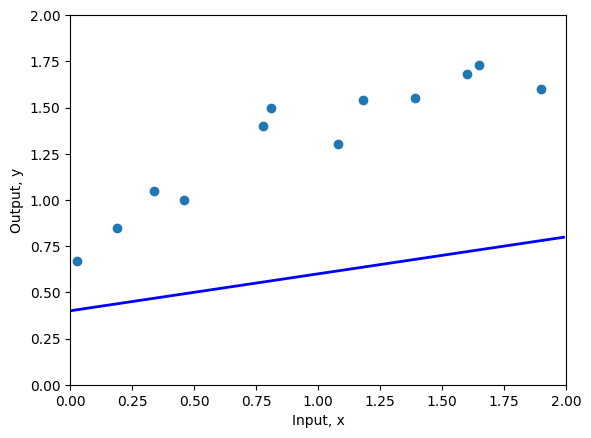

In [6]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [7]:
def compute_loss(x, y, phi0, phi1):
    #get the predicted value of y from our model
    y_pred=f(x, phi0, phi1)
    #calculate the squared differences
    loss=np.sum((y_pred-y)**2)
    return loss

In [8]:
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


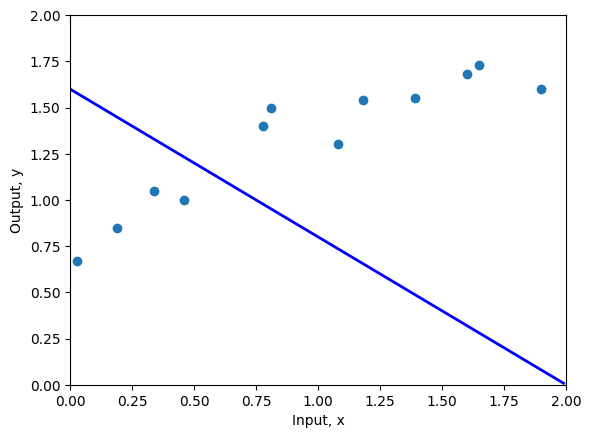

Your Loss = 10.28, Ground truth =10.28


In [9]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

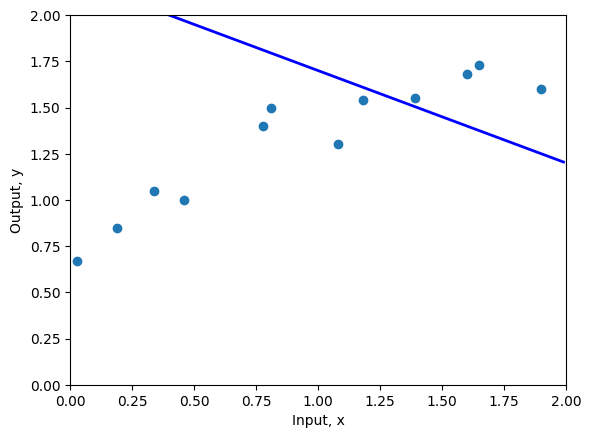

Your Loss = 6.49


In [28]:
phi0 = 2.20 ; phi1 =-0.5

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

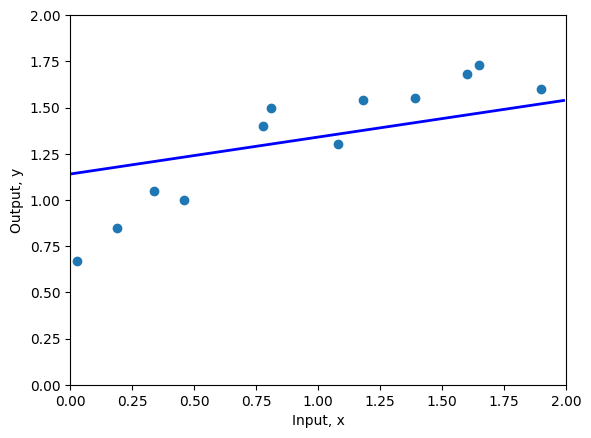

Final phi0: 1.14, Final phi1: 0.20
Minimized Loss = 0.63


In [29]:
#Fancy way
phi0 = 1.60
phi1 = -0.8
step_size = 0.01
iterations = 100

for i in range(iterations):
    current_loss = compute_loss(x, y, phi0, phi1)
    
    # Try adjusting phi0
    if compute_loss(x, y, phi0 + step_size, phi1) < current_loss:
        phi0 += step_size
    elif compute_loss(x, y, phi0 - step_size, phi1) < current_loss:
        phi0 -= step_size
        
    # Try adjusting phi1
    if compute_loss(x, y, phi0, phi1 + step_size) < current_loss:
        phi1 += step_size
    elif compute_loss(x, y, phi0, phi1 - step_size) < current_loss:
        phi1 -= step_size

plot(x, y, phi0, phi1)
print(f'Final phi0: {phi0:3.2f}, Final phi1: {phi1:3.2f}')
print(f'Minimized Loss = {compute_loss(x, y, phi0, phi1):3.2f}')

In [30]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])

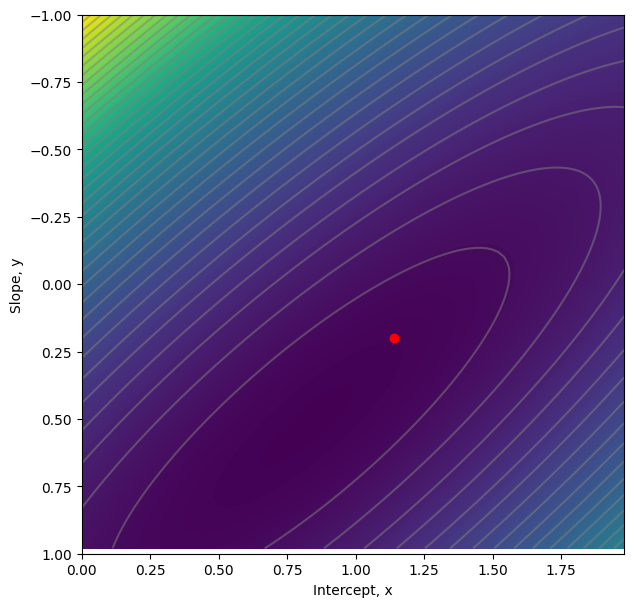

In [32]:

# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, x')
ax.set_ylabel(r'Slope, y')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()